# BAF507-EXERCISE2

# 정회종(20214125)

## 1. 수식 입력하기 LaTex

\begin{align}
x+y &=3 \\
2x -y &= 1\\
\therefore x=1&,y=2
\end{align}

## 근의 공식

$$
a x^2+ b x + c = 0
$$

$$
x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
$$

## 2. DCF 로 NPV 계산하기

아래와 같은 채권이 있다고 가정합니다.

* Face value: $1,000
* Maturity: 5 years
* Coupon rate: 5\% p.a. (per annum)
* Coupon frequency: annual
* Discount rate: 2\%

$$
\text{NPV} = \sum_{t=1}^T \frac{\text{CF}_t}{(1+r)^t}
$$

In [2]:
face = 1000
T = 5
c = 0.05
r = 0.02

## 첫번째 방법

In [10]:
NPV = 0

for t in range(1, T+1):
    CF = face * c
    PV = CF / (1+r)**t
    print(t,CF,PV)
    NPV += PV
  
NPV += face / (1+r)**T

print(NPV)

print('')
print('NPV:{:.4f}'.format(NPV))

1 50.0 49.01960784313725
2 50.0 48.05843906189927
3 50.0 47.11611672735222
4 50.0 46.19227130132571
5 50.0 45.28654049149579
1141.4037852551262

NPV:1141.4038


### 두번째 짧게 쓰기

In [11]:
PVs = [face * c / (1+r)**t for t in range(1,T+1)]

In [12]:
NPV_short = sum(PVs) + face / (1+r)**T

In [13]:
print('NPV:{:.4f}'.format(NPV_short))

NPV:1141.4038


## 3. IRR 계산하기

아까와 같은 채권이 있는데, 이번엔 discount rate 을 모르고 대신 시장 가격을 알고 있다고 가정합시다.

* Face value: \$1,000
* Maturity: 5 years
* Coupon rate: 5\% p.a. (per annum)
* Coupon frequency: annual
* Market price: \$1,130

그렇다면 이 채권의 할인율은 어떻게 계산하면 될까요?

In [15]:
face = 1000
T = 5
c = 0.05
price = 1130

In [16]:
def compute_npv(r):
    PVs = [face * c / (1+r)**t for t in range(1,T+1)]
    NPV_short = sum(PVs) + face / (1+r)**T
    
    return NPV_short

In [17]:
compute_npv(0.03)

1091.5941437438908

In [18]:
for r in [0.02,0.03,0.05]:
    npv = compute_npv(r)
    print('NPV if r = {}%: {:.2f}'.format(r*100,npv))

NPV if r = 2.0%: 1141.40
NPV if r = 3.0%: 1091.59
NPV if r = 5.0%: 1000.00


In [19]:
from scipy import optimize

In [22]:
#error
def error(r):
    return price - compute_npv(r)

In [23]:
sol = optimize.root_scalar(error,bracket=[0.02,0.03])

In [24]:
sol

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.022239858418338223

In [26]:
print('Solution:{:.4f}%'.format(sol.root*100))

Solution:2.2240%


In [27]:
compute_npv(sol.root)

1130.0000000017353

## Or you can use lambda to make it simple

In [28]:
optimize.root_scalar(lambda r:price-compute_npv(r),
                    bracket=[0.02,0.03])

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.022239858418338223

## 4. YTM 과 NPV 관계 그래프 그리기

이번에도 아까와 동일한 채권입니다.

* Face value: \$1,000
* Maturity: 5 years
* Coupon rate: 5\% p.a. (per annum)
* Coupon frequency: annual

다만 이번엔 YTM & 시장 가격 둘 다 몰라서 둘 사이의 관계를 그래프로 그리는게 목적입니다!

In [29]:
import matplotlib.pyplot as plt

In [31]:
min_ytm = 0
max_ytm = 0.10
steps = 10

In [34]:
slope = (max_ytm - min_ytm) / steps

In [45]:
ytm = [min_ytm + slope * x for x in range(steps)]

## 또는 numpy를 사용해서 똑같이 만들 수 있습니다

In [46]:
import numpy as np

In [47]:
incr = (max_ytm-min_ytm)/steps

In [48]:
ytm2 = np.arange(min_ytm,max_ytm,incr)

In [49]:
npv = [compute_npv(r) for r in ytm]

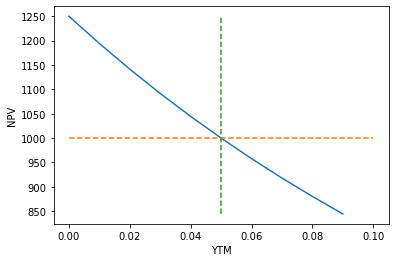

In [53]:
plt.plot(ytm,npv)
plt.plot([0,0.10],[1000,1000],linestyle='dashed', label='NPV=face value')
plt.plot([0.05,0.05],[min(npv),max(npv)],linestyle='dashed',label='coupon rate = YTM')
plt.xlabel('YTM')
plt.ylabel('NPV')
plt.show()